# Data Science Assessment
- Name: Nik Faiz Afiq
- Comnpany: Air Selangor
- Date: 15th Feb 2021 - 19th Feb 2021


# INTRODUCTION

**Hypothesis:**
- How does PCA affect the performance of the model? 
    - improve /reduce the model performance? 
    - Hypothesis: Using PCA on our data will reduce the accuracy of the model, but not that much

## Objective

Finding the best model to predict the X and Y coordinate for each of the receiver in X_test_submission using the data from X_train.csv

**Assumptions made:**
- replace NAN value with the value -100
    - why -100? due to the nature of the NaN value, that it represent no signal or signal too weak, it is reasonable that we mark it as the minimum signal possible. Cannot really remove the value as it will skip the one with NaN value for our test data
- Assuming X and Y coordinate is independent, to ease up our modeling



**Performance measurement:**
- Euclidian distance betwen the predicted point and the real point

## Import

In [1]:
# Importing packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
%matplotlib inline

# METHADOLOGY
## Data Preprocessing



In [2]:
# importing the data
X_train  = pd.read_csv("Dataset/Offline/X_train.csv")
y_train_PinId  = pd.read_csv("Dataset/Offline/y_train.csv")
train_PinInfo = pd.read_csv("Dataset/Offline/PinInfo.csv")

X_test  = pd.read_csv("Dataset/Online/X_test.csv")
y_test_PinId  = pd.read_csv("Dataset/Online/y_test.csv")
test_PinInfo = pd.read_csv("Dataset/Online/PinInfo.csv")
X_test_submission = pd.read_csv("Dataset/Online/X_test_submission.csv")

X_train

,CD4533FFC0E1,D2B6503554D7,D7EE034361F8,DD697EA75B68,DF231643E227,E43355CA8B96,E6D9D20DD197,E8FD0B453DC4,F1307ECB3B90,F1EDAF28E08A,F69A86823B96,F8EE8B0847A4,FDAE5980F28C,EC72840D9AD3,E96AF2C858BA,E13B805C6CB0,FB2EE01C18CE
0,-83.852941,-87.000000,-66.034483,-86.791667,-89.041667,-76.217391,-96.333333,-85.909091,-69.342105,-84.575000,-79.028571,-84.735294,-83.666667,NaN,NaN,NaN,NaN
1,-84.800000,-87.600000,-66.136364,-85.812500,-88.411765,-76.720930,-95.000000,-88.416667,-69.117647,-84.978261,-78.354839,-81.407407,-82.714286,-77.590909,NaN,NaN,NaN
2,-84.000000,-87.454545,-66.531250,-86.142857,-90.000000,-76.766667,-95.000000,-86.333333,-69.291667,-85.081081,-78.000000,-83.033333,-84.388889,-80.920000,NaN,NaN,NaN
3,-87.450000,-89.428571,-65.818182,-85.769231,-89.333333,-76.388889,-96.000000,-88.384615,-69.850000,-84.520000,-77.150000,-82.312500,-82.421053,-76.090909,NaN,NaN,NaN
4,-84.757576,-88.333333,-65.636364,-86.214286,-89.444444,-76.818182,NaN,-87.666667,-68.551724,-86.306122,-78.388889,-85.764706,-82.619048,-79.866667,-98.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1570,-91.111111,-86.000000,-80.222222,-83.777778,-93.250000,-72.000000,NaN,-93.071429,-81.423077,-70.017544,-81.785714,-87.409091,-83.000000,NaN,NaN,-89.545455,NaN
1571,-90.000000,-85.555556,-80.666667,-83.631579,-93.500000,-72.461538,NaN,-92.222222,-78.714286,-70.895833,-87.222222,-83.000000,-89.000000,NaN,NaN,-91.000000,NaN
1572,-89.300000,-87.076923,-78.781250,-85.727273,-92.800000,-71.976190,NaN,-93.052632,-80.785714,-70.962264,-85.166667,-84.200000,-84.772727,NaN,NaN,-90.400000,NaN
1573,-90.100000,-86.750000,-82.333333,-83.850000,-93.166667,-71.895833,NaN,-92.785714,-78.800000,-70.949153,-85.318182,-84.789474,-86.000000,NaN,NaN,-90.000000,NaN


In [3]:
# lookup the x and y coordinate for the y-train
y_train = pd.merge(left = y_train_PinId ,right  = train_PinInfo,how= "left",
                  left_on = "PinId", right_on = "pinId").iloc[:,2:]
y_train

,x,y
0,11.17660,5.29753
1,11.17660,5.29753
2,11.17660,5.29753
3,11.17660,5.29753
4,11.17660,5.29753
...,...,...
1570,8.17867,5.28213
1571,8.17867,5.28213
1572,8.17867,5.28213
1573,8.17867,5.28213


In [4]:
# lookup the x and y coordinate for the y-test
# only keep  the X and Y coordinate
y_test = pd.merge(left = y_test_PinId ,right  = test_PinInfo,how= "left",
                  left_on = "PinId", right_on = "pinId").iloc[:,2:]
y_test

,x,y
0,6.136286,5.525337
1,6.136286,5.525337
2,6.136286,5.525337
3,6.136286,5.525337
4,6.136286,5.525337
...,...,...
286,28.965874,10.063169
287,28.965874,10.063169
288,28.965874,10.063169
289,28.965874,10.063169


In [5]:
# Descriptive analysis
X_train.iloc[:,:9].describe()

,CD4533FFC0E1,D2B6503554D7,D7EE034361F8,DD697EA75B68,DF231643E227,E43355CA8B96,E6D9D20DD197,E8FD0B453DC4,F1307ECB3B90
count,1500.000000,1329.000000,1489.000000,1480.000000,1418.000000,1054.000000,836.000000,1153.000000,1387.000000
mean,-85.307795,-85.906442,-86.432911,-86.708529,-86.057089,-84.928891,-85.388299,-88.843995,-83.073399
std,7.447779,5.079135,7.624345,6.356746,7.100093,7.749371,9.042254,6.640661,7.829528
min,-98.000000,-97.000000,-98.000000,-96.800000,-98.000000,-98.000000,-98.000000,-98.000000,-98.000000
25%,-90.333333,-89.294118,-92.350000,-91.648810,-92.534091,-91.732692,-93.584936,-93.931034,-88.900000
50%,-86.635255,-86.833333,-87.384615,-88.045455,-86.414216,-86.130682,-87.488511,-91.153846,-84.545455
75%,-81.480249,-83.653846,-81.526316,-83.747984,-81.166493,-79.716912,-79.417360,-84.900000,-77.288690
max,-63.967742,-67.121212,-65.500000,-66.818182,-69.000000,-69.000000,-63.626087,-71.888889,-64.970588


In [6]:
# Descriptive analysis
X_train.iloc[:,9:].describe()

,F1EDAF28E08A,F69A86823B96,F8EE8B0847A4,FDAE5980F28C,EC72840D9AD3,E96AF2C858BA,E13B805C6CB0,FB2EE01C18CE
count,818.000000,1413.000000,1351.000000,1215.000000,1371.000000,987.000000,1265.000000,633.000000
mean,-86.576718,-84.703182,-86.952298,-86.970494,-83.781197,-86.779707,-85.606172,-89.050662
std,8.676981,7.357371,7.030047,7.515789,7.683391,8.388016,8.331793,6.604332
min,-98.000000,-98.000000,-98.000000,-98.000000,-98.000000,-98.000000,-98.000000,-98.000000
25%,-93.154687,-90.750000,-92.250000,-93.543561,-89.054094,-93.837719,-91.500000,-95.000000
50%,-89.298246,-85.875000,-89.546875,-87.000000,-86.200000,-89.611111,-87.409091,-89.384615
75%,-80.155000,-79.560000,-82.079683,-82.495463,-79.075499,-77.830599,-82.115385,-84.880597
max,-67.476923,-66.107143,-68.941176,-66.097561,-61.191489,-67.560000,-67.395833,-68.000000


In [7]:
# Find Percentage of data that have Null/NA value for X_train
X_train.isnull().sum()/X_train.shape[0]

CD4533FFC0E1    0.047619
D2B6503554D7    0.156190
D7EE034361F8    0.054603
DD697EA75B68    0.060317
DF231643E227    0.099683
E43355CA8B96    0.330794
E6D9D20DD197    0.469206
E8FD0B453DC4    0.267937
F1307ECB3B90    0.119365
F1EDAF28E08A    0.480635
F69A86823B96    0.102857
F8EE8B0847A4    0.142222
FDAE5980F28C    0.228571
EC72840D9AD3    0.129524
E96AF2C858BA    0.373333
E13B805C6CB0    0.196825
FB2EE01C18CE    0.598095
dtype: float64

In [8]:
# Impute the missing value with -100
X_train.fillna(-100, inplace = True) 

In [9]:
# Checking for any missing NA value
X_train.isnull().any().sum()

0

In [10]:
# Find Percentage of data that have Null/NA value for X_test
X_test.isnull().sum()/X_test.shape[0]

CD4533FFC0E1    0.137457
D2B6503554D7    0.247423
D7EE034361F8    0.089347
DD697EA75B68    0.292096
DF231643E227    0.329897
E43355CA8B96    0.243986
E6D9D20DD197    0.512027
E8FD0B453DC4    0.539519
F1307ECB3B90    0.099656
F1EDAF28E08A    0.233677
F69A86823B96    0.281787
F8EE8B0847A4    0.054983
FDAE5980F28C    0.388316
EC72840D9AD3    0.140893
E96AF2C858BA    0.673540
E13B805C6CB0    0.340206
FB2EE01C18CE    0.907216
dtype: float64

In [11]:
# Impute the missing value with -100
X_test.fillna(-100, inplace = True) 

In [12]:
# Find Percentage of data that have Null/NA value for X_test_submission
X_test_submission.isnull().sum()/X_test_submission.shape[0]

CD4533FFC0E1    0.222222
D2B6503554D7    0.392361
D7EE034361F8    0.218750
DD697EA75B68    0.170139
DF231643E227    0.513889
E43355CA8B96    0.392361
E6D9D20DD197    0.694444
E8FD0B453DC4    0.361111
F1307ECB3B90    0.243056
F1EDAF28E08A    0.649306
F69A86823B96    0.159722
F8EE8B0847A4    0.319444
FDAE5980F28C    0.277778
EC72840D9AD3    0.218750
E96AF2C858BA    0.635417
E13B805C6CB0    0.413194
FB2EE01C18CE    0.753472
dtype: float64

In [13]:
# Impute the missing value with -100
X_test_submission.fillna(-100, inplace = True)

## Data Analysis

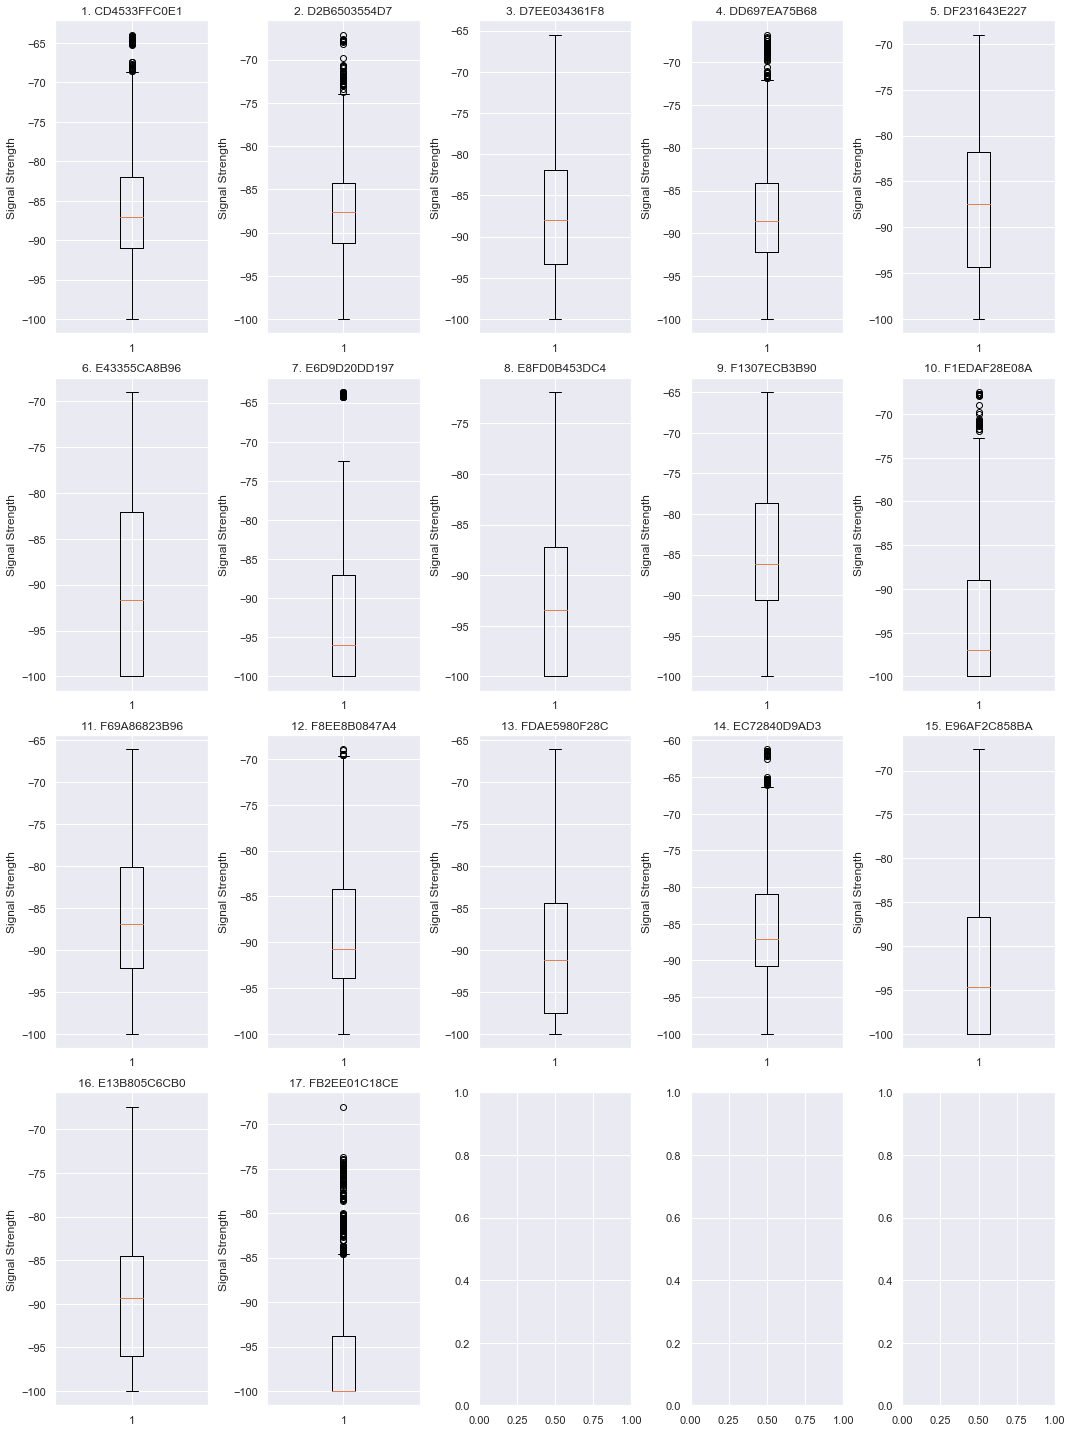

In [14]:
# Box plot for each of the variables
fig, axes = plt.subplots(4, 5, figsize=(15, 20))

ax = axes.ravel()
for i in range(17):
    ax[i].boxplot(X_train.iloc[:,i])
    ax[i].set_title(str(i+1)+". "+ X_train.columns[i])
    ax[i].set_ylabel("Signal Strength")
#     ax[i].set_ylabel("")
fig.tight_layout()
plt.show()

In [15]:
# Split the target variable into 2 variable
y_train_1 = y_train.iloc[:,0].ravel()
y_test_1 = y_test.iloc[:,0].ravel()

y_train_2 = y_train.iloc[:,1].ravel()
y_test_2 = y_test.iloc[:,1].ravel()

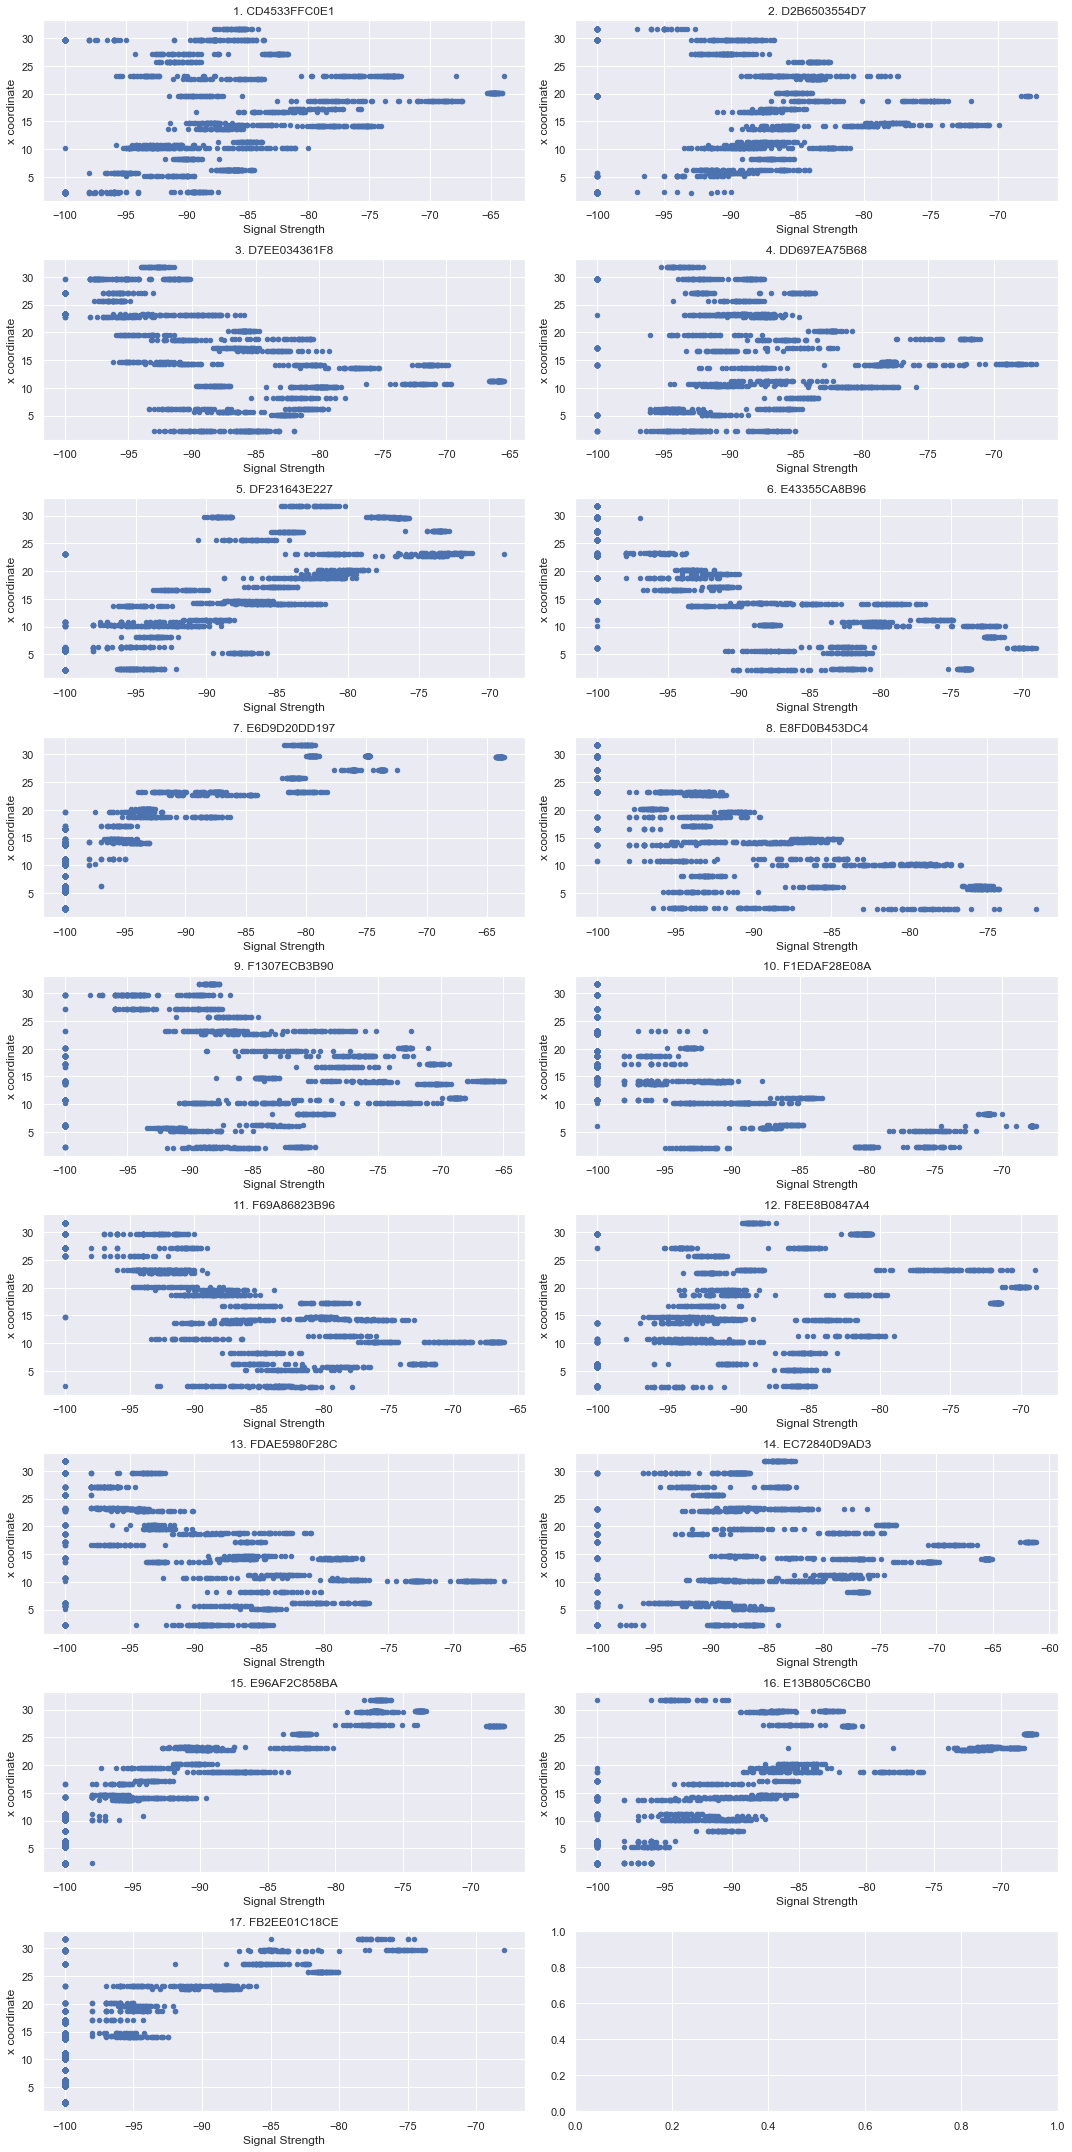

In [16]:
# Scatter plot of the signal strength of each receiver with X - coordinate of the receiver
fig, axes = plt.subplots(9, 2, figsize=(15, 30))

ax = axes.ravel()
for i in range(17):
    ax[i].scatter(X_train.iloc[:,i],y_train_1,s = 20)
    ax[i].set_title(str(i+1)+". "+ X_train.columns[i])
    ax[i].set_xlabel("Signal Strength")
    ax[i].set_ylabel("x coordinate")
fig.tight_layout()
plt.show()

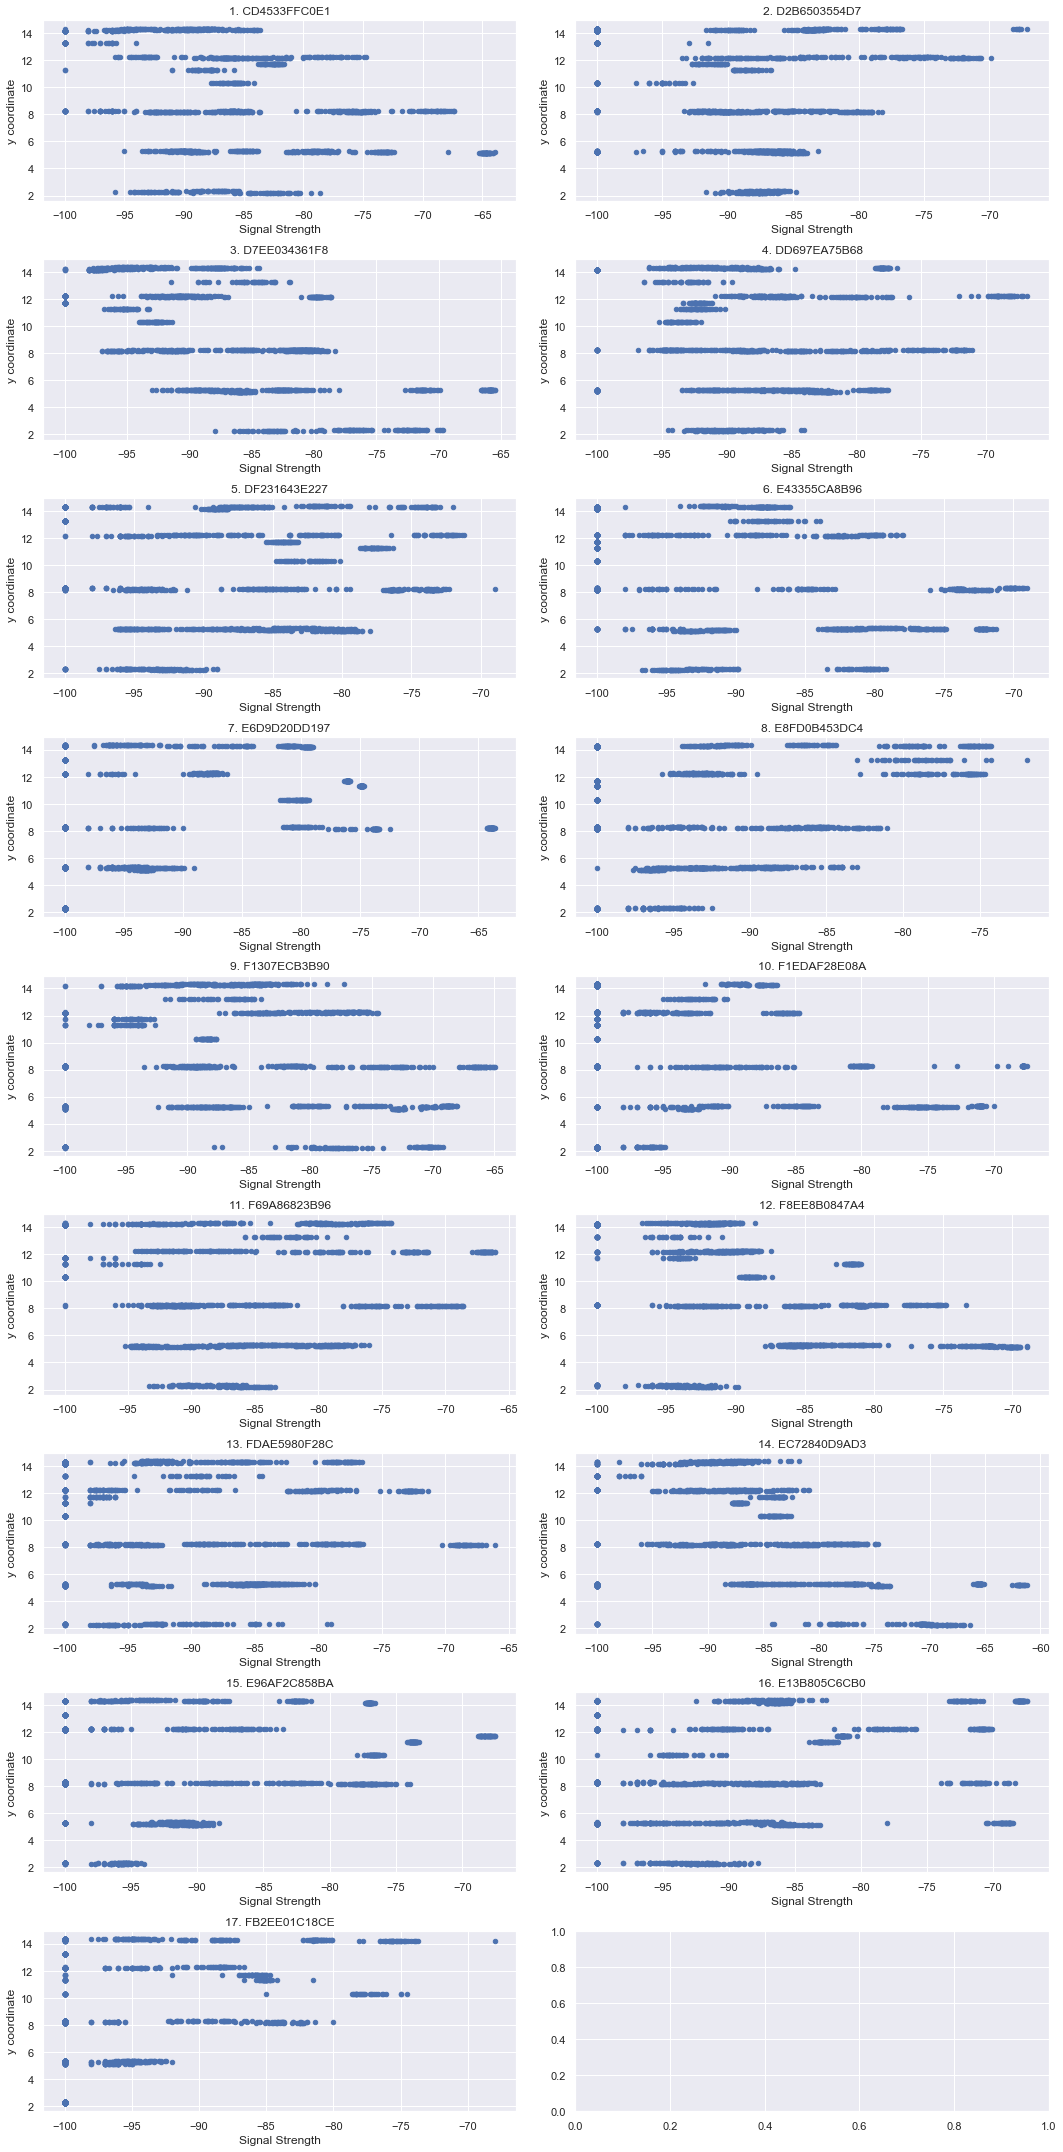

In [17]:
# Exploratory Analysis - plot the signal strength of each receiver with Y - coordinate of the receiver
fig, axes = plt.subplots(9, 2, figsize=(15, 30))

ax = axes.ravel()
for i in range(17):
    ax[i].scatter(X_train.iloc[:,i],y_train_2,s = 20)
    ax[i].set_title(str(i+1)+". "+ X_train.columns[i])
    ax[i].set_xlabel("Signal Strength")
    ax[i].set_ylabel("y coordinate")
fig.tight_layout()
plt.show()

## Modeling using Machine Learning



### Without using PCA

In [18]:
# no scaling needed since all of the x-variables already using the same unit/scale

In [19]:
# Import the model package
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor

# Initialize all the model used
linear_regression = LinearRegression()
support_vector_regression = SVR(kernel='rbf')
decision_tree = DecisionTreeRegressor(random_state=42)
random_forest = RandomForestRegressor(random_state=42)
KNN = KNeighborsRegressor()
multi_layer_perceptron = MLPRegressor(hidden_layer_sizes=(100, ),max_iter = 500, random_state=42)

In [20]:
# modeling

# model name for the looping
models = ['linear_regression' ,
          'support_vector_regression',
          'decision_tree' ,
          'random_forest' ,
          'KNN',
          'multi_layer_perceptron' ]

# Create a table to keep all the pefrormance for the model
score = pd.DataFrame(columns = ["Model","Error"])

for i in range(len(models)):
    # Fit the model
    # prediction on the model
    
    model_1 = eval(models[i]).fit(X_train,y_train_1)    
    y_pred_1 = model_1.predict(X_test)

    model_2 = eval(models[i]).fit(X_train,y_train_2)
    y_pred_2 = model_2.predict(X_test)
    
    # write the performance for each model
    # using euclidian distance as the error
    score = score.append({
        "Model":models[i],
        "Error": round(sum(np.sqrt((y_pred_1 - y_test_1)**2+(y_pred_2 - y_test_2)**2)),3)
    },ignore_index = True)
    
score

,Model,Error
0,linear_regression,1163.199
1,support_vector_regression,481.263
2,decision_tree,1033.199
3,random_forest,743.498
4,KNN,647.303
5,multi_layer_perceptron,1180.639


https://machinelearningmastery.com/multi-output-regression-models-with-python/

In [21]:
# Inherently Multioutput Regression

models = ['linear_regression' ,
          'decision_tree' ,
          'random_forest' ,
          'KNN',
          'multi_layer_perceptron' ]

score = pd.DataFrame(columns = ["Model","Error"])

for i in range(len(models)):
    model = eval(models[i]).fit(X_train,y_train)
    y_pred = model.predict(X_test)

    
    score = score.append({
        "Model":models[i],
        "Error": round(sum(np.sqrt((y_pred[:,0] - y_test.iloc[:,0] )**2+(y_pred[:,1]  - y_test.iloc[:,1] )**2)),3)
    },ignore_index = True)
    
score


,Model,Error
0,linear_regression,1163.199
1,decision_tree,780.388
2,random_forest,724.461
3,KNN,647.303
4,multi_layer_perceptron,1096.722


In [22]:
# Using multioutput wrapper for single output model
from sklearn.multioutput import MultiOutputRegressor

models = ['support_vector_regression']

score = pd.DataFrame(columns = ["Model","Error"])

for i in range(len(models)):
    wrapper = MultiOutputRegressor(eval(models[i]))
    wrapper.fit(X_train, y_train)
    y_pred = wrapper.predict(X_test)

    
    score = score.append({
        "Model":models[i],
        "Error": round(sum(np.sqrt((y_pred[:,0] - y_test.iloc[:,0] )**2+(y_pred[:,1]  - y_test.iloc[:,1] )**2)),3)
    },ignore_index = True)
    
score

,Model,Error
0,support_vector_regression,481.263


In [23]:
# Using Chained Multioutput Regression
# Another approach to using single-output regression models for multioutput regression is to create a linear sequence of models.

# The first model in the sequence uses the input and predicts one output; the second model uses the input and the output 
# from the first model to make a prediction; the third model uses the input and output from the first two models to make a 
# prediction, and so on 



# Using Chained Multioutput Regression
from sklearn.multioutput import RegressorChain

models = ['support_vector_regression']

score = pd.DataFrame(columns = ["Model","Error"])

for i in range(len(models)):
    wrapper = RegressorChain(eval(models[i]))
    wrapper.fit(X_train, y_train)
    y_pred = wrapper.predict(X_test)

    
    score = score.append({
        "Model":models[i],
        "Error": round(sum(np.sqrt((y_pred[:,0] - y_test.iloc[:,0] )**2+(y_pred[:,1]  - y_test.iloc[:,1] )**2)),3)
    },ignore_index = True)
    
score

,Model,Error
0,support_vector_regression,597.624


### Using PCA for Dimentionality Reduction

In [24]:
# apply PCA to our model

from sklearn.decomposition import PCA

# keep the first five principal components of the data
pca = PCA(n_components=5)

# fit PCA model to the data
pca.fit(X_train)

# transform data onto the principal components
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

# checking the shape
print("Original shape: {}".format(str(X_train_pca.shape)))
print("Reduced shape: {}".format(str(X_train_pca.shape)))

Original shape: (1575, 5)
Reduced shape: (1575, 5)


In [25]:
#Explaine variance
print(pca.explained_variance_)

[532.06329215 192.80474497  98.08474116  68.82744139  59.96981078]


In [26]:
# Ratio of explaine variance
pca.explained_variance_ratio_

array([0.44131622, 0.15992056, 0.08135571, 0.05708845, 0.04974155])

In [27]:
# total of the explaine variance that can be explained by our PCA model
sum(pca.explained_variance_ratio_)

0.7894224922638817

In [28]:
# Manually predict target separately

models = ['linear_regression' ,
          'support_vector_regression',
          'decision_tree' ,
          'random_forest' ,
          'KNN',
          'multi_layer_perceptron' ]

score = pd.DataFrame(columns = ["Model","Error"])

for i in range(len(models)):
    model_1 = eval(models[i]).fit(X_train_pca,y_train_1)
    y_pred_1 = model_1.predict(X_test_pca)

    model_2 = eval(models[i]).fit(X_train_pca,y_train_2)
    y_pred_2 = model_2.predict(X_test_pca)
    
    score = score.append({
        "Model":models[i],
        "Error": round(sum(np.sqrt((y_pred_1 - y_test_1)**2+(y_pred_2 - y_test_2)**2)),3)
    },ignore_index = True)
    
score

D:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
D:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


,Model,Error
0,linear_regression,829.447
1,support_vector_regression,427.979
2,decision_tree,714.663
3,random_forest,603.647
4,KNN,591.980
5,multi_layer_perceptron,745.873


In [29]:
# Inherently Multioutput Regression

models = ['linear_regression' ,
#           'support_vector_regression',
          'decision_tree' ,
          'random_forest' ,
          'KNN',
          'multi_layer_perceptron' ]

score = pd.DataFrame(columns = ["Model","Error"])

for i in range(len(models)):
    model = eval(models[i]).fit(X_train_pca,y_train)
    y_pred = model.predict(X_test_pca)

    
    score = score.append({
        "Model":models[i],
        "Error": round(sum(np.sqrt((y_pred[:,0] - y_test.iloc[:,0] )**2+(y_pred[:,1]  - y_test.iloc[:,1] )**2)),3)
    },ignore_index = True)
    
score

D:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


,Model,Error
0,linear_regression,829.447
1,decision_tree,689.227
2,random_forest,588.034
3,KNN,591.980
4,multi_layer_perceptron,751.862


In [30]:
# Using multioutput wrapper for single output model
from sklearn.multioutput import MultiOutputRegressor

models = ['support_vector_regression']

score = pd.DataFrame(columns = ["Model","Error"])

for i in range(len(models)):
    wrapper = MultiOutputRegressor(eval(models[i]))
    wrapper.fit(X_train_pca, y_train)
    y_pred = wrapper.predict(X_test_pca)

    
    score = score.append({
        "Model":models[i],
        "Error": round(sum(np.sqrt((y_pred[:,0] - y_test.iloc[:,0] )**2+(y_pred[:,1]  - y_test.iloc[:,1] )**2)),3)
    },ignore_index = True)
    
score

,Model,Error
0,support_vector_regression,427.979


In [31]:
# Using Chained Multioutput Regression
from sklearn.multioutput import RegressorChain

models = ['support_vector_regression']


score = pd.DataFrame(columns = ["Model","Error"])

for i in range(len(models)):
    wrapper = RegressorChain(eval(models[i]))
    wrapper.fit(X_train_pca, y_train)
    y_pred = wrapper.predict(X_test_pca)

    
    score = score.append({
        "Model":models[i],
        "Error": round(sum(np.sqrt((y_pred[:,0] - y_test.iloc[:,0] )**2+(y_pred[:,1]  - y_test.iloc[:,1] )**2)),3)
    },ignore_index = True)
    
score

,Model,Error
0,support_vector_regression,427.651


In [32]:
# Predict X_test_submission

# Method - Support vector machines with PCA
# transform

X_test_sub_pca = pca.transform(X_test_submission)
# modeling

svr = SVR(kernel='rbf')
wrapper = RegressorChain(svr)
wrapper.fit(X_train_pca, y_train)
y_forcast = wrapper.predict(X_test_sub_pca)
print(y_forcast)
pd.DataFrame(y_forcast,columns = ["X","Y"]).to_csv("submission.csv",index=False)

# submission = np.hstack([y_forcast_x.reshape(-1,1),y_forcast_y.reshape(-1,1)])
# pd.DataFrame(submission,columns = ["X","Y"]).to_csv("submission.csv",index=False)


[[ 4.32412204 11.89121799]
 [ 3.77285073 11.24425566]
 [ 4.52937751 11.69572398]
 [ 4.49904175 11.13865762]
 [ 4.48658184 10.43847319]
 [ 4.24529933 12.15979007]
 [ 4.2139223  11.72050077]
 [ 4.54770778 12.01493021]
 [ 3.01171838 12.23747013]
 [ 3.92412395 11.54319555]
 [ 5.25016157 12.86550101]
 [ 4.26440608 10.78532127]
 [ 4.1225045  11.18303671]
 [ 3.61506181  9.09629125]
 [ 4.59271218 11.97834255]
 [ 4.23995049 12.12190651]
 [ 3.78079376 11.63736945]
 [ 4.59329458 11.58422563]
 [ 3.28250181 11.63684846]
 [ 4.16194562 13.99316901]
 [ 4.84838396 12.59116058]
 [ 3.27147595 12.07096402]
 [ 5.33622899 11.86688473]
 [ 5.06916564 12.20812505]
 [ 4.38303394 11.68378989]
 [ 3.4416361  11.71383576]
 [ 4.67509492 11.8472124 ]
 [ 4.60854741 11.83902033]
 [ 4.14344425 11.88561716]
 [ 3.5642131   9.66653616]
 [10.45523103 14.52025258]
 [ 6.26338223 14.33511417]
 [ 4.53159973  9.29707575]
 [ 4.77488461 13.05785413]
 [ 2.75504409 11.09207768]
 [ 3.98811942 12.40328333]
 [ 4.32431621 12.05514312]
 